### Importação

In [4]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets , metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import random
import matplotlib.cm as cm
import numpy as np

In [5]:
random.seed(2021)

### Carregue o dataset

Iremos usar o conjunto de dados "Optical Recognition of Handwritten Digits", nele foram usados programas de pré-processamento disponibilizados pelo NIST para extrair bitmaps normalizados de dígitos manuscritos de um formulário pré-impresso. De um total de 43 pessoas, 30 contribuíram para o conjunto de treinamento e 13 diferentes para o conjunto de teste. Os bitmaps de 32x32 são divididos em blocos não sobrepostos de 4x4 e o número de pixels é contado em cada bloco. Isso gera uma matriz de entrada de 8x8, onde cada elemento é um número inteiro no intervalo de 0 a 16. Isso reduz a dimensionalidade e dá invariância a pequenas distorções.

In [6]:
digits = datasets.load_digits()

### Para visualizar os dígitos execute a célula abaixo

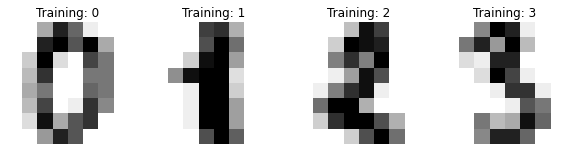

In [7]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

### Para usar a imagem, precisamos formatar cada matriz de pixels como um array de uma única  linha, a célula abaixo executa este processo

In [8]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

### Imprima o número de linhas e de colunas do conjunto de dados

In [9]:
data.shape

(1797, 64)

### Vamos variar o valor de k e escolher de acordo com o gráfico do método do cotovelo. Também coletar os valores de silhueta para cada clusterização
 

In [11]:
clusterings = [] 
inertias =[]
silhouettes = [] 
sample_silhouette_values = [] 
mink= 2
maxk= 25
for k in range(mink, maxk):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X=data)
    clusterings.append(kmeans)
    inertias.append(kmeans.inertia_)
    silhouettes.append(metrics.silhouette_score(data, kmeans.labels_, metric="euclidean"))
    sample_silhouette_values.append( silhouette_samples(data, kmeans.labels_))
    

### Plotando o gráfico com a variação da inércia obtida

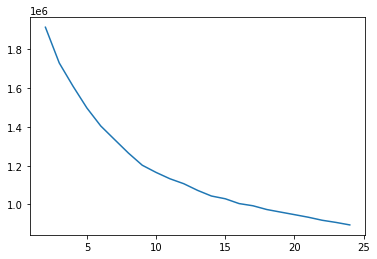

In [12]:
plt.plot(range(mink, maxk),inertias)

### Pelo método do cotovelo escolhemos k=11

In [15]:
result = clusterings[9]

In [16]:
result.n_clusters

11

### A função a seguir plot o gráfico da silhueta

In [17]:
def plot_silhouette(cl, sample_sv , silhouette_avg, k ):
    X = data
    y_lower = 10

    n_clusters = cl.n_clusters
    cluster_labels = cl.labels_
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_sv[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the {} clusters".format(k))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



C:\Users\gabri\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


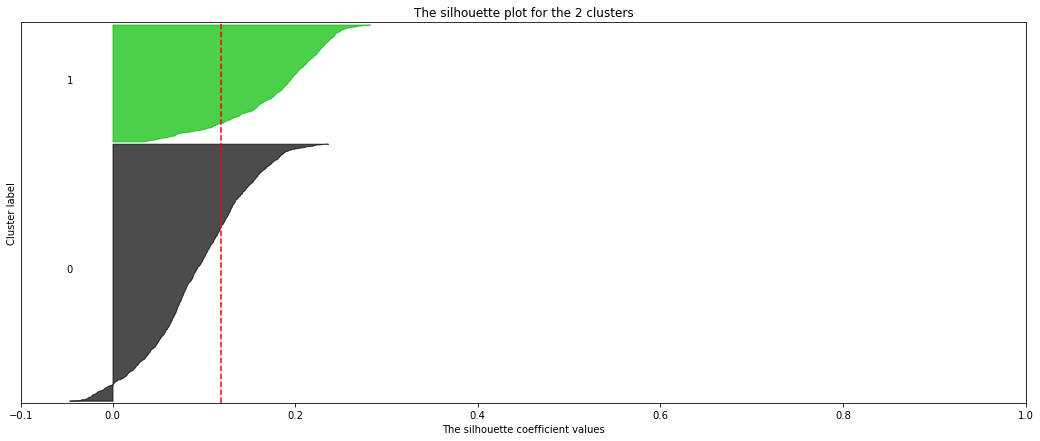

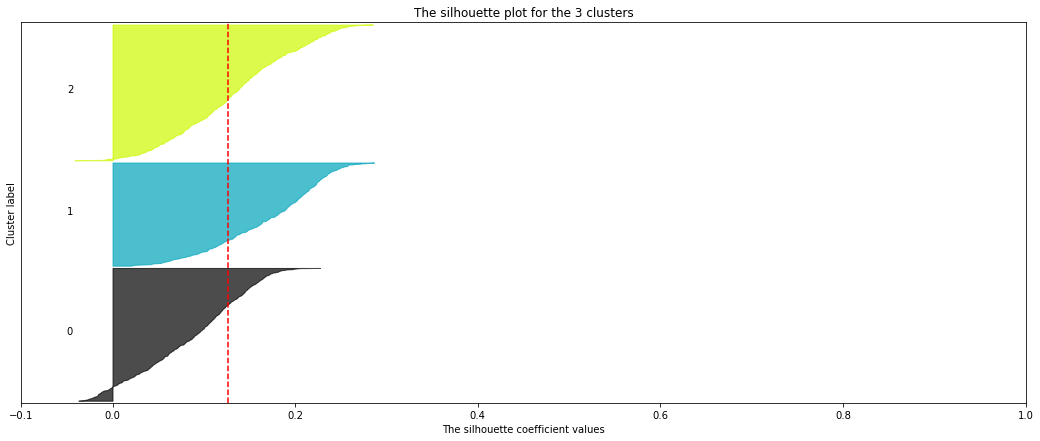

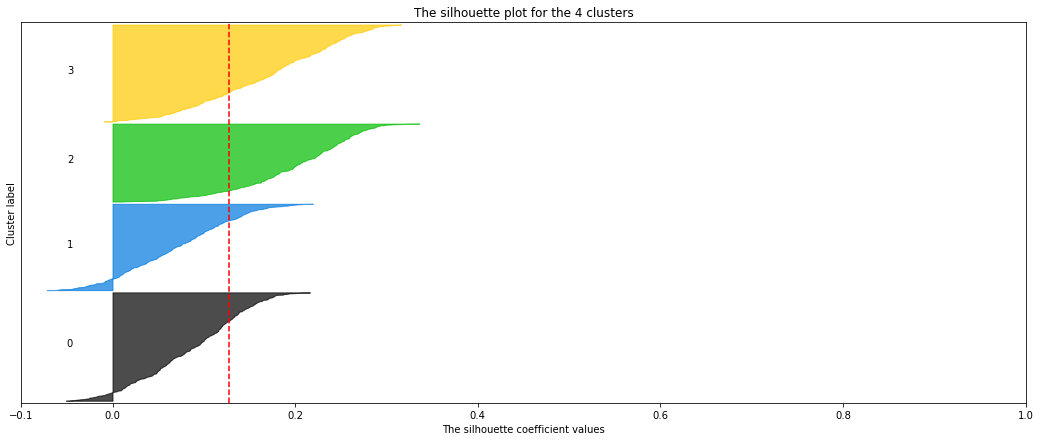

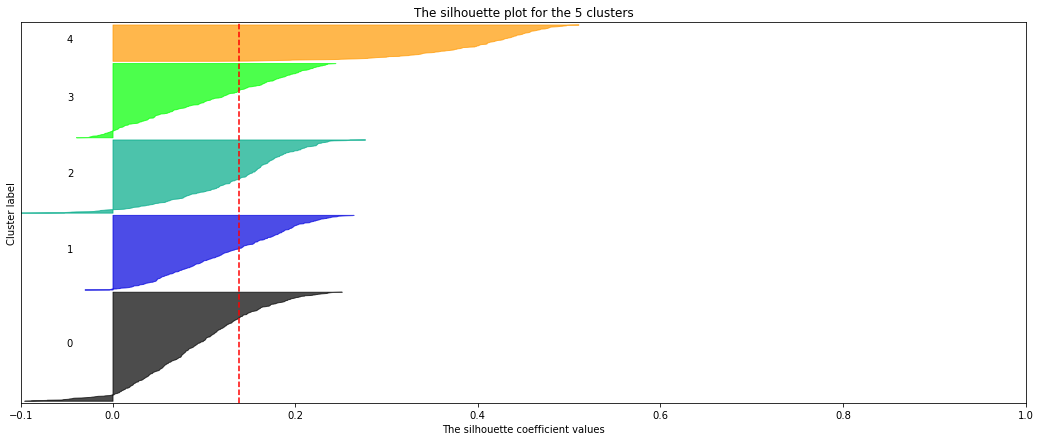

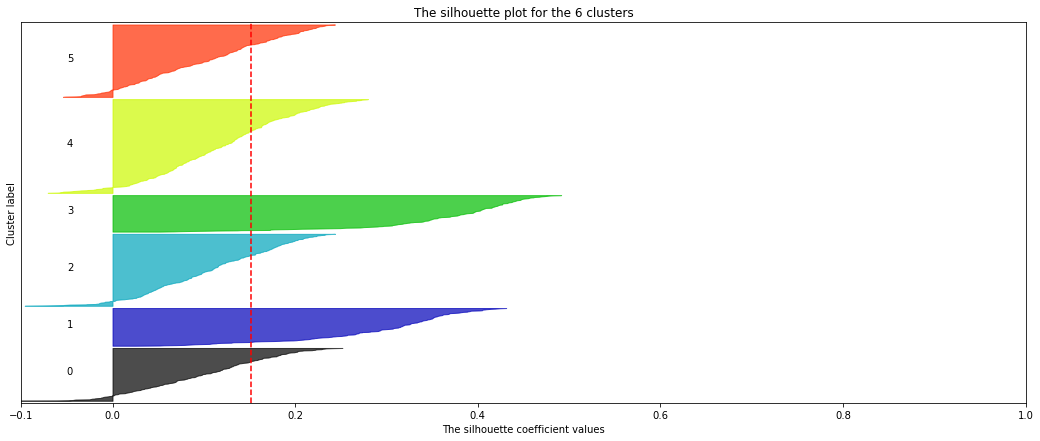

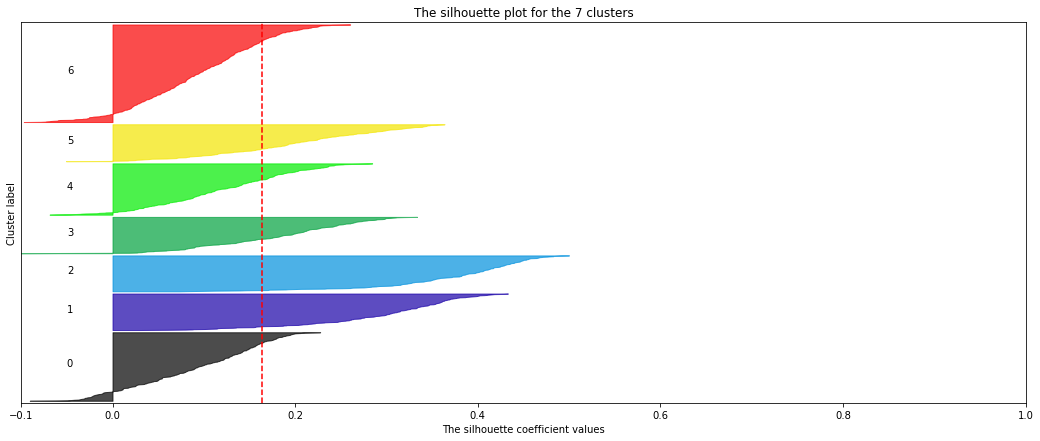

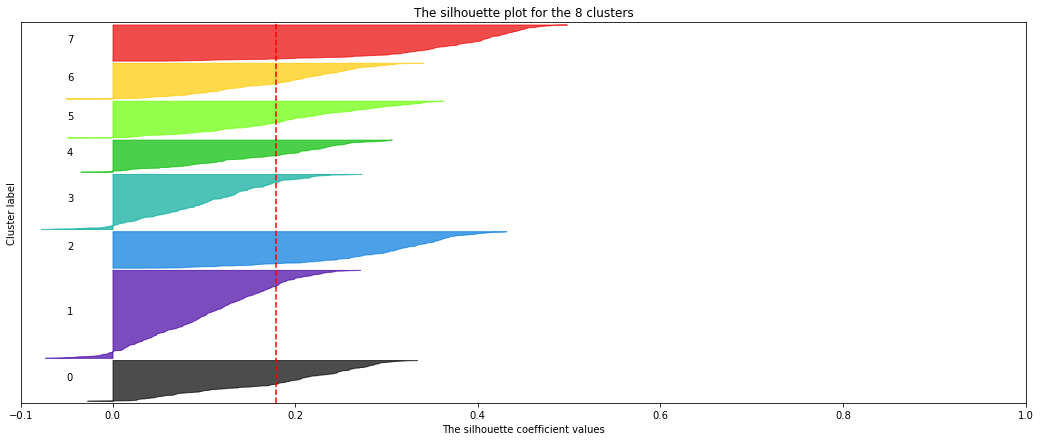

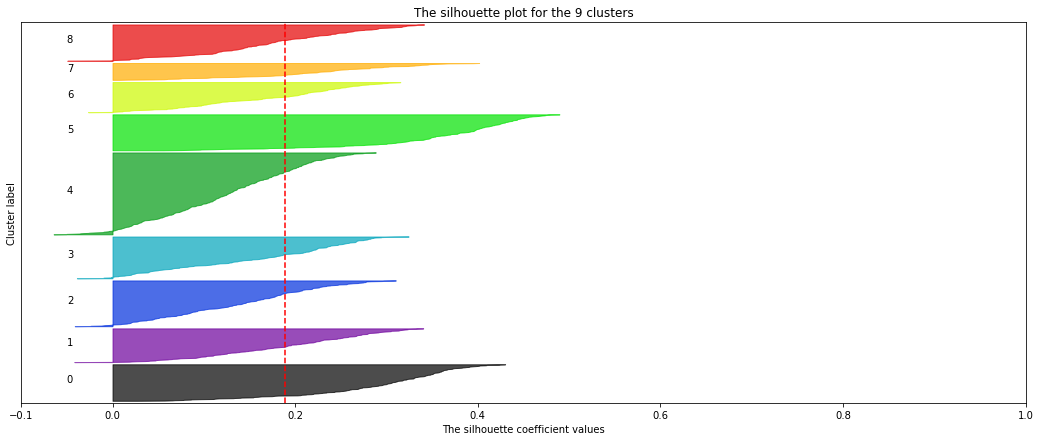

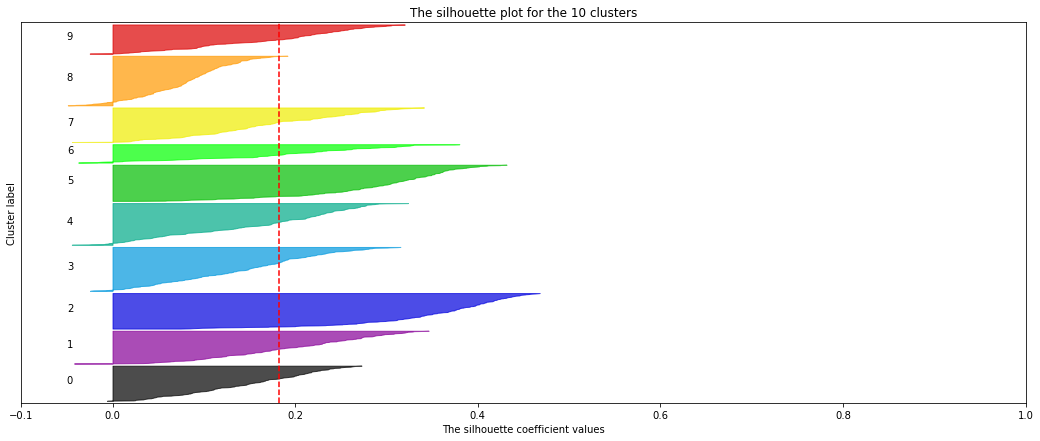

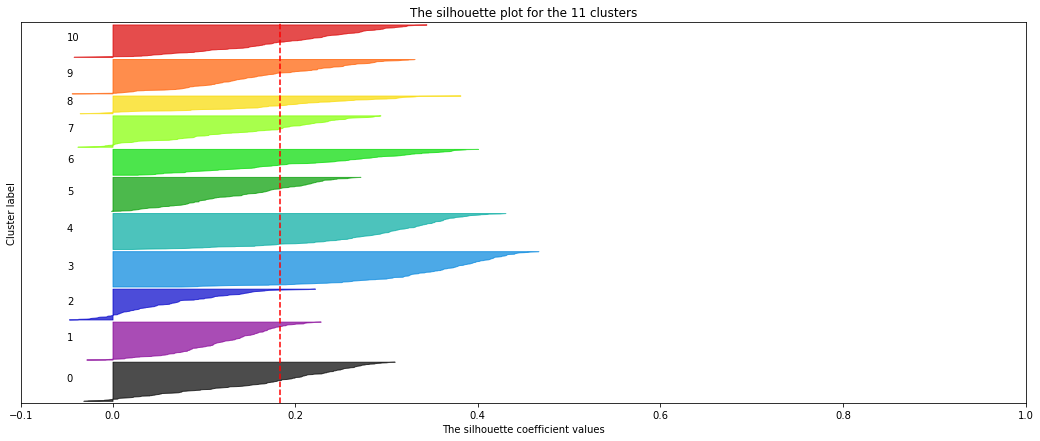

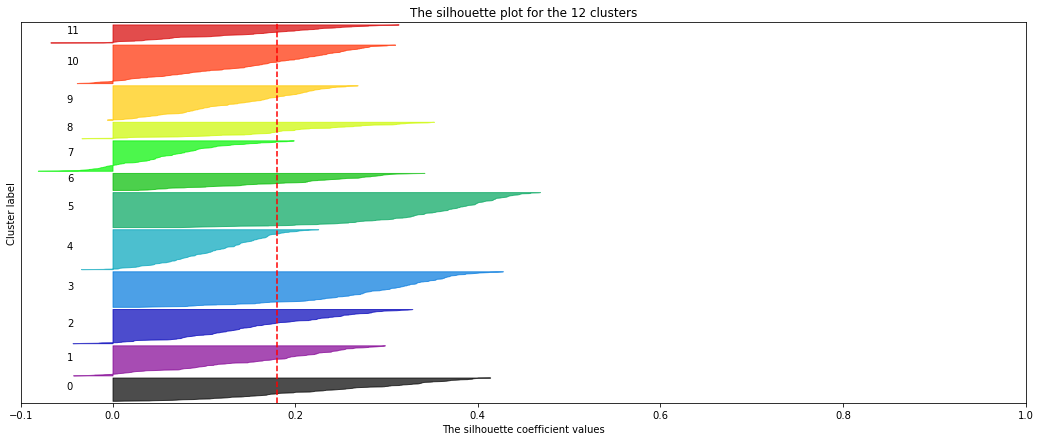

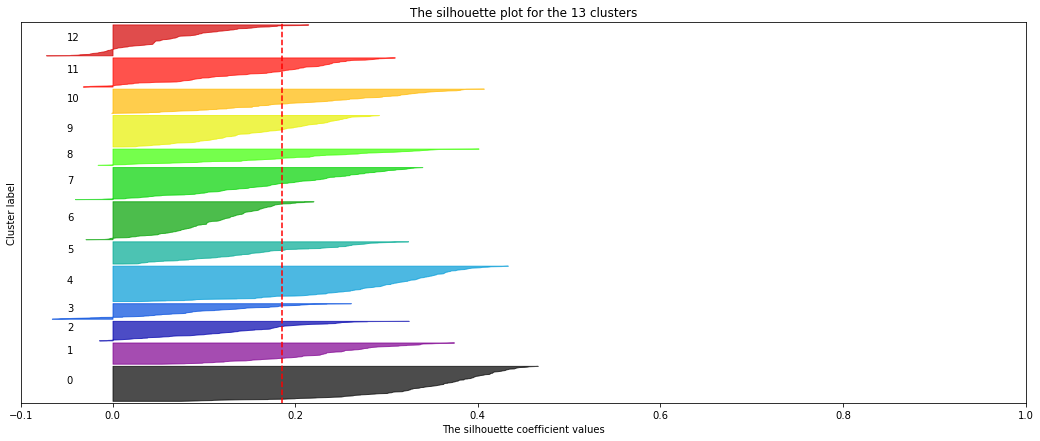

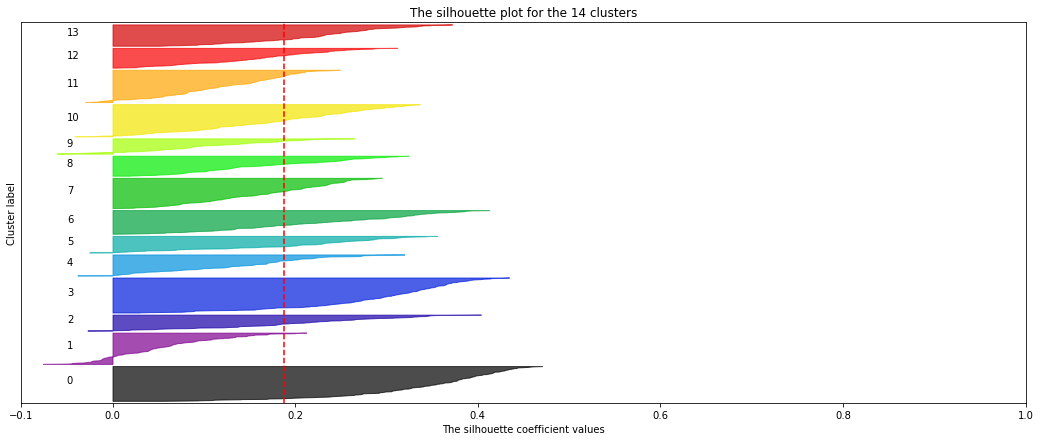

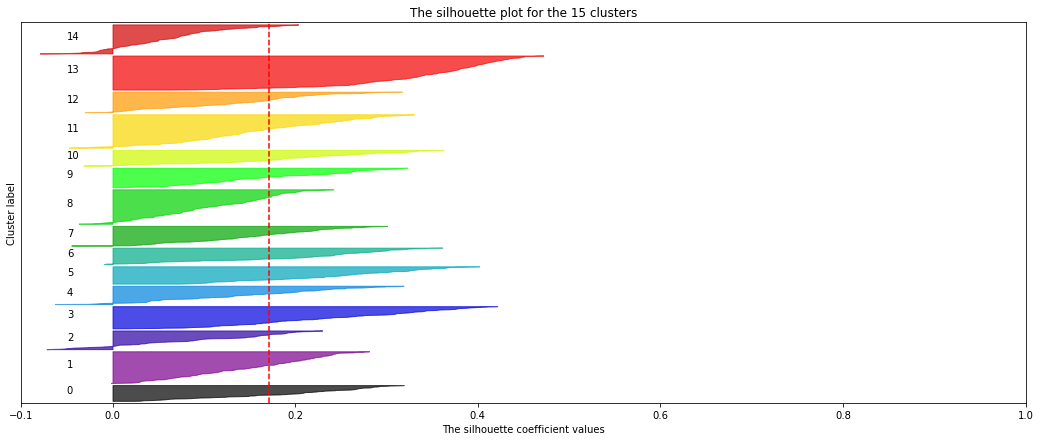

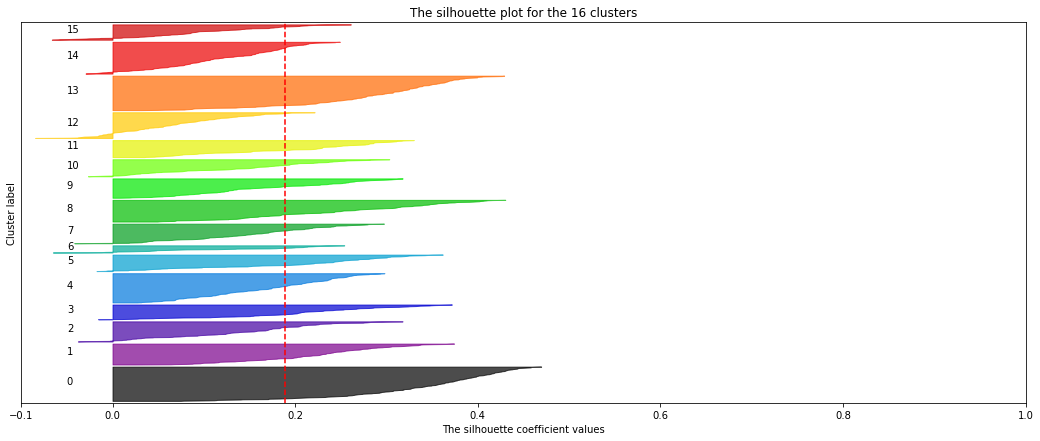

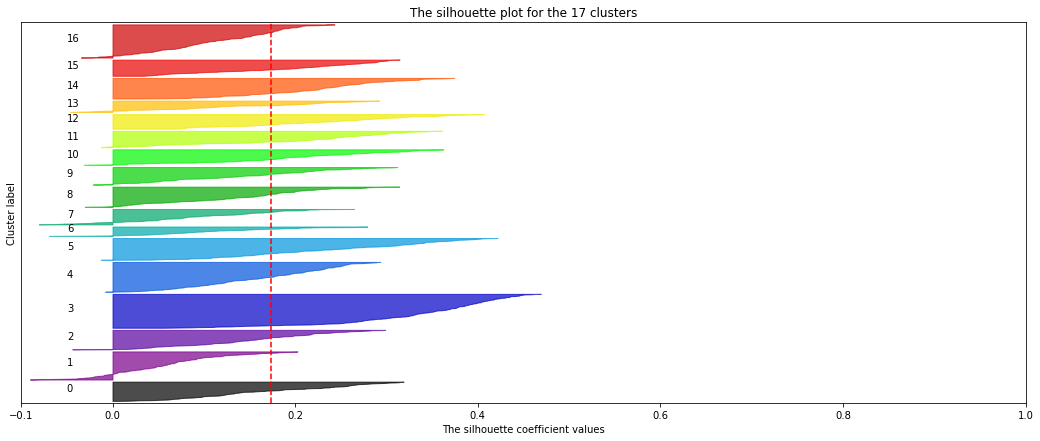

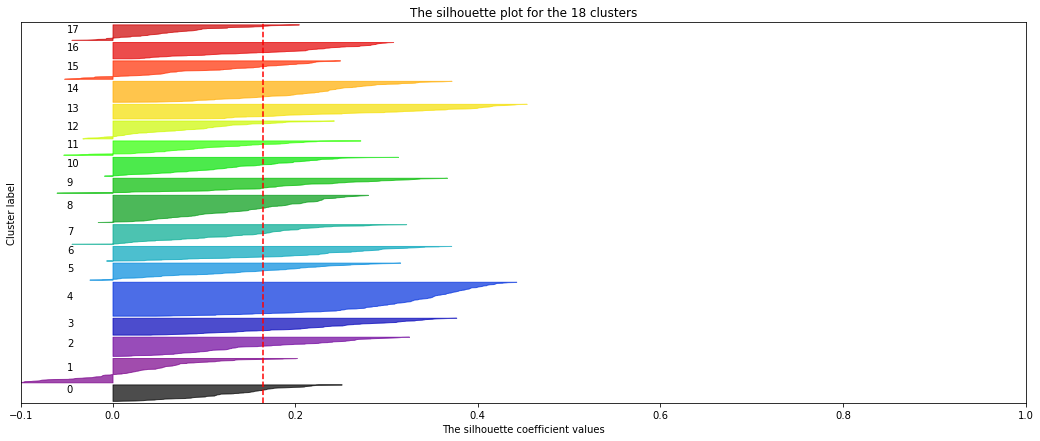

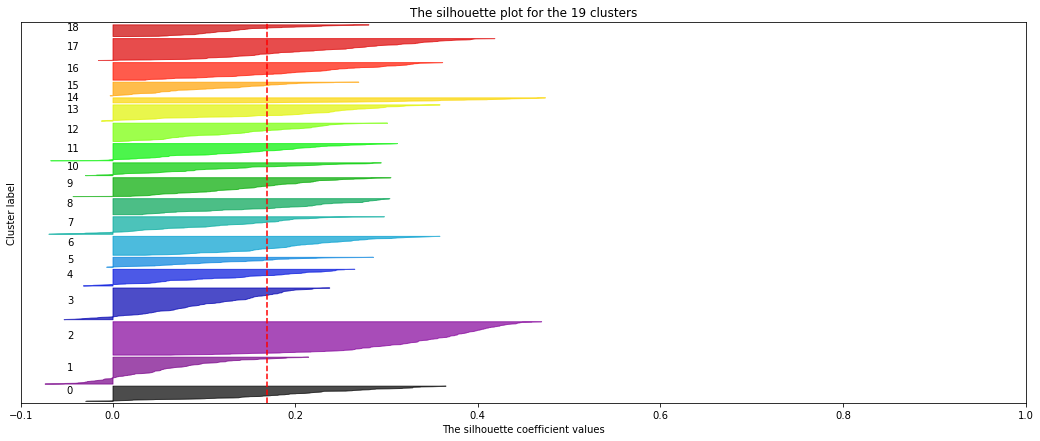

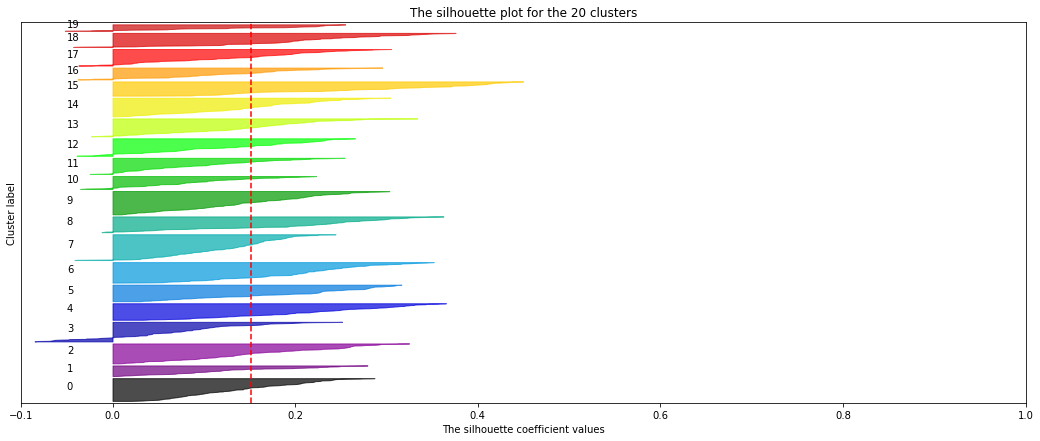

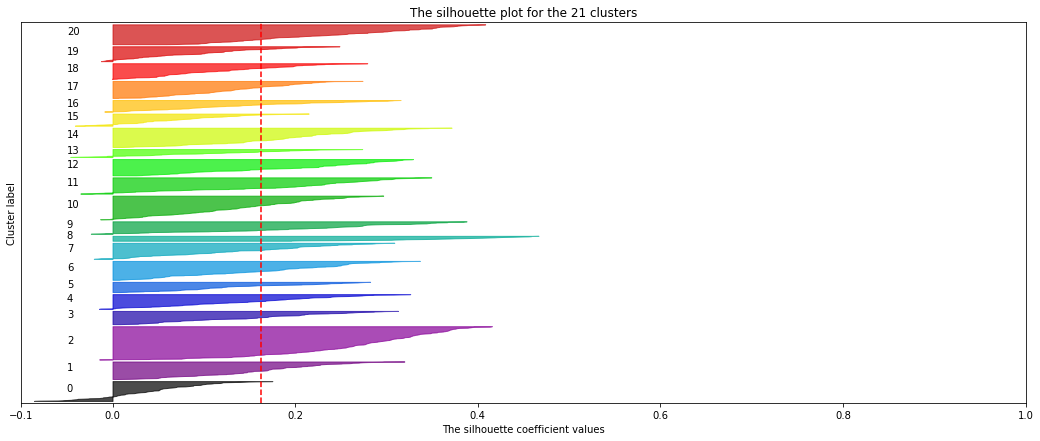

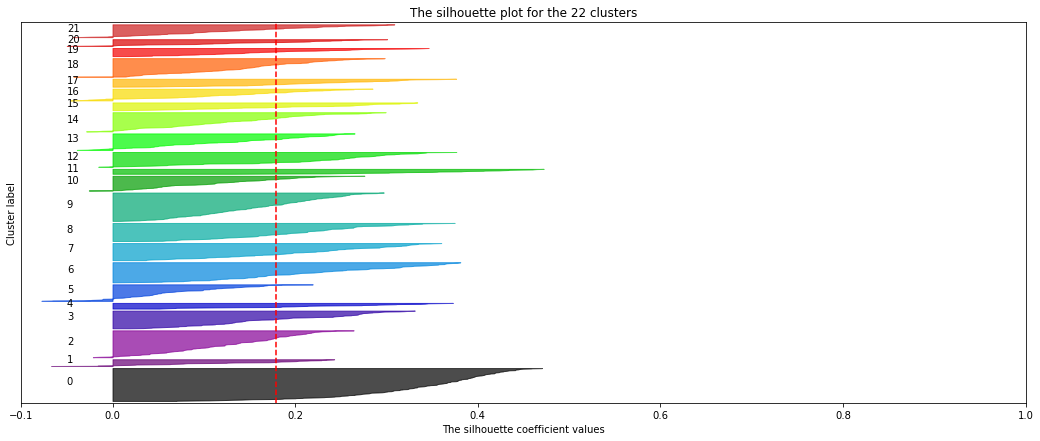

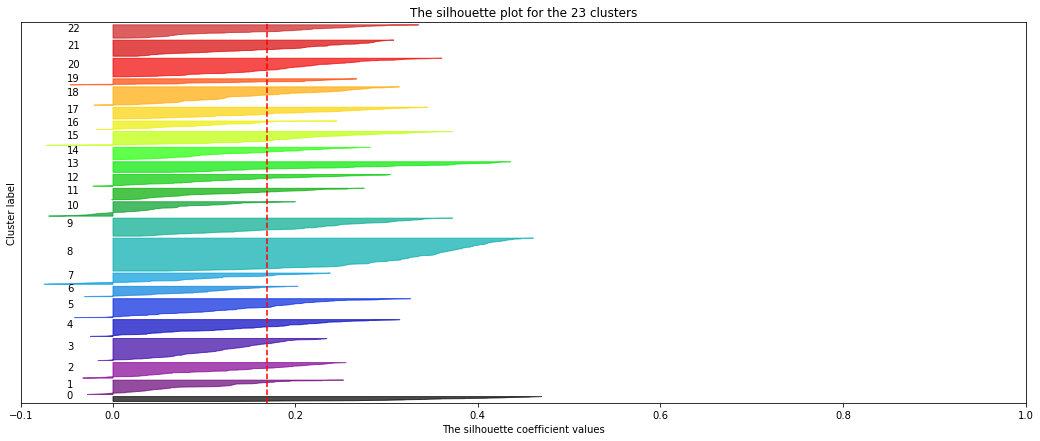

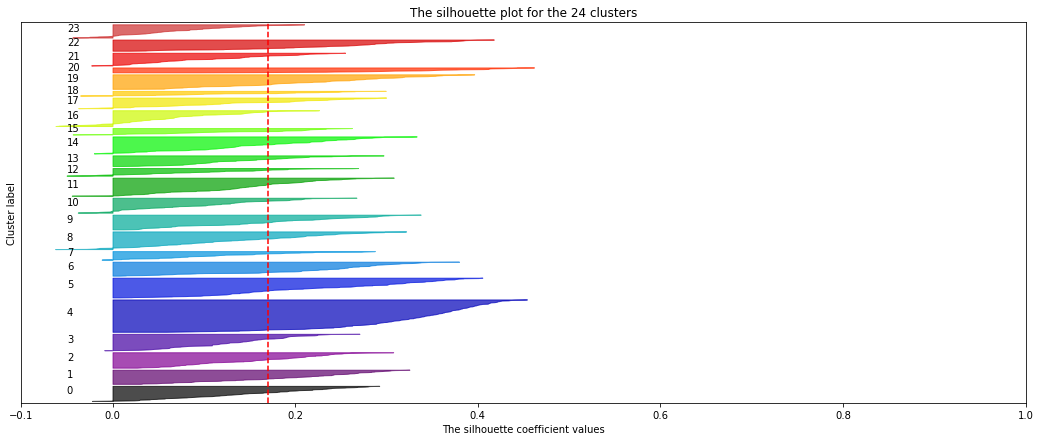

In [18]:
for cl, sample_sv , silhouette_avg in zip(clusterings, sample_silhouette_values, silhouettes):

    plot_silhouette(cl, sample_sv, silhouette_avg, cl.n_clusters)

### Vamos plotar  imagens de alguns clusters. Observe se há valores atribuídos erroneamente.

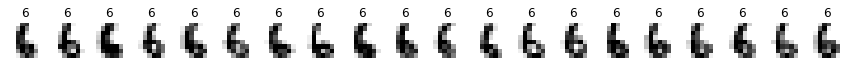

In [22]:
_, axes = plt.subplots(nrows=1, ncols=20, figsize=(15,15))
for ax, image, label in zip(axes, digits.images[result.labels_==4], digits.target[result.labels_==4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

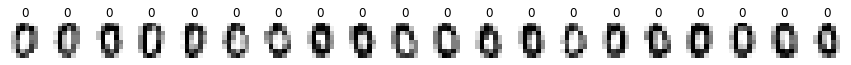

In [23]:
_, axes = plt.subplots(nrows=1, ncols=20, figsize=(15,15))
for ax, image, label in zip(axes, digits.images[result.labels_==3], digits.target[result.labels_==3]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

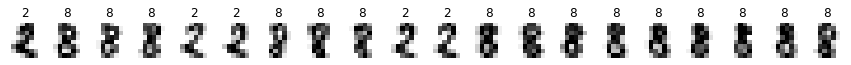

In [24]:
_, axes = plt.subplots(nrows=1, ncols=20, figsize=(15,15))
for ax, image, label in zip(axes, digits.images[result.labels_==2], digits.target[result.labels_==2]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

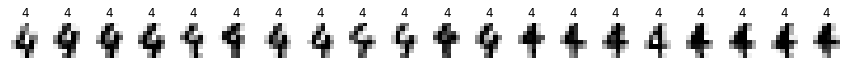

In [25]:
_, axes = plt.subplots(nrows=1, ncols=20, figsize=(15,15))
for ax, image, label in zip(axes, digits.images[result.labels_==10], digits.target[result.labels_==10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

## Para usar a clusterização e predizer o cluster de uma nova instância, usamos o método predict

#### Note que no exemplo foi utilizada uma instância usada na clusterização, apenas para exemplificar a utilização do método

In [26]:
# Predict the value of the digit on the test subset
predicted = result.predict([data[100,:]])

In [27]:
predicted

array([10])